## Importing Libraries
* **pandas**: For data manipulation and analysis
* **sklearn.cluster**: For clustering algorithms 
* **sklearn.model_selection**: For splitting the dataset into training and testing sets 
* **sklearn.ensemble**: For building ensemble models 
* **scipy.cluster.hierarchy**: For hierarchical clustering algorithms 
* **matplotlib.pyplot**: For data visualization 
* **seaborn**: For creating attractive and informative statistical graphics 
* **random**: For generating random numbers 
* **numpy**: For numerical computing 

In [4]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from scipy.spatial.distance import cdist
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt
import os


## Reading in the input data

In [5]:
# Load the data
try:
    data = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Could not find the input file. Please check the file path and try again.")
    exit()

## Viewing the first few rows of the data

In [6]:
data.head()

,device_name,min_consumption,max_consumption,device_age
0,bulb,100.0,120.0,3
1,LED TV 42 INCH,58.0,60.0,5
2,3''belt sander,1000.0,1000.0,4
3,Air cooler,65.0,80.0,4
4,Air purifier,25.0,30.0,3


## Getting values for input_power, working_hours, and output_power

This code cell generates values for the `input_power`, `working_hours`, and `output_power` columns of the `data` DataFrame based on the `min_consumption` and `max_consumption` columns.


In [7]:
min_c = data['min_consumption'].values
max_c = data['max_consumption'].values
random_consumption = [rd.uniform(min_c[i], max_c[i]) for i in range(len(min_c))]
working_hours = []
for i in range(len(min_c)):
    random_hours = rd.randint(0,24)
    working_hours.append(random_hours)
data['input_power'] = random_consumption
data['working_hours'] = working_hours
output_power = []
for i in range(len(min_c)):
    output_power.append(rd.uniform(random_consumption[i] * 0.70 , random_consumption[i]))
    output_power[i] = output_power[i]
data['output_power'] = output_power 
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power
0,bulb,100.0,120.0,3,105.928727,3,99.312261
1,LED TV 42 INCH,58.0,60.0,5,58.583087,1,49.866588
2,3''belt sander,1000.0,1000.0,4,1000.000000,8,739.444845
3,Air cooler,65.0,80.0,4,66.589025,24,51.837873
4,Air purifier,25.0,30.0,3,26.381050,14,21.394432


## Calculating efficiency metrics

This code cell calculates the `Enhanced_efficiency` and `efficiency` columns of the `data` DataFrame based on the `input_power`, `output_power`, and `min_consumption` columns.

In [8]:
Enhanced_efficiency = []
for i in range(len(min_c)):
    Enhanced_efficiency.append(output_power[i]/random_consumption[i]*100)
data['Enhanced_efficiency'] = Enhanced_efficiency
efficiency = data['output_power']/data['min_consumption']*100
data['efficiency'] = efficiency
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,105.928727,3,99.312261,93.753851,99.312261
1,LED TV 42 INCH,58.0,60.0,5,58.583087,1,49.866588,85.121133,85.976875
2,3''belt sander,1000.0,1000.0,4,1000.000000,8,739.444845,73.944484,73.944484
3,Air cooler,65.0,80.0,4,66.589025,24,51.837873,77.847473,79.750573
4,Air purifier,25.0,30.0,3,26.381050,14,21.394432,81.097729,85.577729


## Handling values

In [9]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,105.928727,3,99.312261,93.753851,99.312261
1,LED TV 42 INCH,58.0,60.0,5,58.583087,1,49.866588,85.121133,85.976875
2,3''belt sander,1000.0,1000.0,4,1000.000000,8,739.444845,73.944484,73.944484
3,Air cooler,65.0,80.0,4,66.589025,24,51.837873,77.847473,79.750573
4,Air purifier,25.0,30.0,3,26.381050,14,21.394432,81.097729,85.577729


## Adjusting efficiency values



In [10]:
List_efficiency = data['efficiency'].values
List_enhan_efficiency = data['Enhanced_efficiency'].values

for i in range(len(List_efficiency)):
    # if enhance efficiency is greater than enhance efficiency then minus abs value for efficiency
    if List_enhan_efficiency[i] > List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] - abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is less than enhance efficiency then plus abs value for efficiency
    elif List_enhan_efficiency[i] < List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is equal to enhance efficiency then plus abs value for efficiency
    else:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
data['efficiency'] = List_efficiency
data['efficiency'] = data['efficiency'].apply(lambda x: 200 if x > 200 else x)
data['efficiency'] = data['efficiency'].apply(lambda x: 0 if x < 0 else x)
data['Enhanced_efficiency'] = data['Enhanced_efficiency'].apply(lambda x: 200 if x > 200 else x)
data['Enhanced_efficiency'] = data['Enhanced_efficiency'].apply(lambda x: 0 if x < 0 else x)
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,105.928727,3,99.312261,93.753851,104.870671
1,LED TV 42 INCH,58.0,60.0,5,58.583087,1,49.866588,85.121133,86.832617
2,3''belt sander,1000.0,1000.0,4,1000.000000,8,739.444845,73.944484,73.944484
3,Air cooler,65.0,80.0,4,66.589025,24,51.837873,77.847473,81.653674
4,Air purifier,25.0,30.0,3,26.381050,14,21.394432,81.097729,90.057729


## Training a GradientBoostingRegressor model

In [11]:
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['efficiency']
Normal = DecisionTreeRegressor()
Normal.fit(X, y)
Normal.score(X, y)
print(Normal.feature_importances_)


[0.41825492 0.07505376 0.50669133]


In [12]:
#feature to predict enhanced efficiency with K-centroid
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['Enhanced_efficiency']


In [24]:
def find_centroid(cluster):
    """
    Calculates the centroid of a cluster.

    Args:
        cluster: A list of data points.

    Returns:
        The centroid of the cluster.
    """
    centroid = sum(cluster) / len(cluster)
    return centroid

## k-centroid hierarchical clustering


In [26]:
def hierarchical_clustering(dataset, k):
    """
    Performs hierarchical clustering on the given dataset using k-centroid link.

    Args:
        dataset: A list of data points.
        k: The number of neighbors of a centroid.

    Returns:
        A list of clusters.
    """
    
    # Initialize the clusters.
    clusters = [[x] for x in dataset]
    
    # Iterate over all pairs of clusters.
    for _ in range(len(dataset) - 1):
        min_distance = float('inf')
        merge_clusters = ()
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # Calculate the distance between the two clusters.
                dist_1 = []
                dist_2 = []
                
                # Find centroids for clusters Ci and Cj.
                centroid_i = find_centroid(clusters[i])
                centroid_j = find_centroid(clusters[j])
                
                # Calculate distances from objects in Ci to centroid_i.
                for obj in clusters[i]:
                    dist_1.append(np.linalg.norm(obj - centroid_i))
                
                # Calculate distances from objects in Cj to centroid_j.
                for obj in clusters[j]:
                    dist_2.append(np.linalg.norm(obj - centroid_j))
                
                # Select the k nearest neighbors from each cluster.
                dist_1 = sorted(dist_1)[:k]
                dist_2 = sorted(dist_2)[:k]
                
                neighbors = []
                for obj1 in dist_1:
                    for obj2 in dist_2:
                        #obj1 and obj2 are the distances from Ci to Cj and Cj to Ci respectively calculated above.
                        neighbors.append(obj1 + obj2)


                # Calculate the average  = total distance / min(k, len(Ci) * len(Cj)).
                average_distance = sum(neighbors) / min(k, len(clusters[i]) * len(clusters[j]))
                if average_distance < min_distance:
                    min_distance = average_distance
                    # Store the closest pair of clusters.
                    merge_clusters = (i, j)
        
        # Merge the two closest clusters.
        merged_cluster = clusters[merge_clusters[0]] + clusters[merge_clusters[1]]
        clusters = [c for idx, c in enumerate(clusters) if idx not in merge_clusters]
        clusters.append(merged_cluster)
    
    # Return the list of clusters.
    return clusters


In [31]:
# Run the hierarchical clustering algorithm
clusters = hierarchical_clustering(X.values, 5)
print(clusters)

[[array([1500.        , 4500.        , 3507.29300731]), array([ 3800.        , 11400.        ,  7723.45974939]), array([ 500.       , 1800.       , 1445.2598131]), array([5400.        , 6750.        , 5677.40393732]), array([ 7500.        , 10500.        ,  9570.08571766]), array([220.        , 270.        , 261.14772009]), array([1800.        , 5000.        , 1974.21604287]), array([100., 100., 100.]), array([6000.        , 6700.        , 6594.82125497]), array([4000.        , 3000.        , 3168.60461023]), array([ 8000.        , 14000.        ,  8072.74254576]), array([2000.        , 3000.        , 2886.42676343]), array([2000.        , 7000.        , 6863.73404555]), array([1600.        , 3400.        , 2605.29707409]), array([ 4.        , 34.        , 33.16906853]), array([1800.        , 5000.        , 2140.53856143]), array([6600.        , 8800.        , 8613.28547337]), array([1300.        , 1500.        , 1465.25301243]), array([ 50.        , 100.        ,  79.39794423]), array

In [28]:
# Print the clusters
for i, cluster in enumerate(clusters):
    print('Cluster {}:'.format(i + 1))
    for point in cluster:
        print(point)
    print()

Cluster 1:
[ 7500.         10500.          9570.08571766]
[220.         270.         261.14772009]
[ 8000.         14000.          8072.74254576]
[2000.         3000.         2886.42676343]
[6600.         8800.         8613.28547337]
[1300.         1500.         1465.25301243]
[3250.         9750.         6142.86954302]
[240.         860.         673.28628172]
[3000.         7500.         4908.26687128]
[ 50.         100.          69.69479839]
[1500.         4500.         3507.29300731]
[ 3800.         11400.          7723.45974939]
[ 500.        1800.        1445.2598131]
[5400.         6750.         5677.40393732]
[2000.         5000.         4120.98305935]
[400.         700.         585.16685471]
[ 4.         34.         33.16906853]
[1800.         5000.         2140.53856143]
[2000.         7000.         6863.73404555]
[1600.         3400.         2605.29707409]
[1800.         5000.         1974.21604287]
[100. 100. 100.]
[6000.         6700.         6594.82125497]
[4000.         3

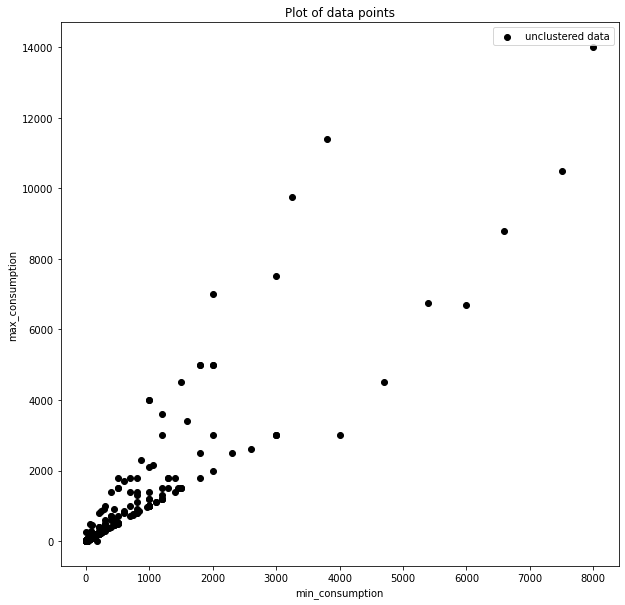

In [32]:
#plot the clusters with sns scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(X['min_consumption'], X['max_consumption'], c='black', label='unclustered data')
plt.xlabel('min_consumption')
plt.ylabel('max_consumption')
plt.legend()
plt.title('Plot of data points')
plt.show()




## Gradient Boosting Regressor Model with Enhanced Efficiency


In [15]:
# Print the centroids for Enhanced efficiency
for i, cluster in enumerate(clusters):
    print('Centroid {}:'.format(i + 1))
    print(find_centroid(cluster))
    print()
K_centroid = DecisionTreeRegressor()
K_centroid.fit(X, y)
K_centroid.score(X, y)
print(K_centroid.feature_importances_)

Centroid 1:
[549.50982609 855.70405686 706.77567386]

[0.22715328 0.32934793 0.44349879]


## Test input

In [16]:

test_input = [[300, 600, 400]]
test_output = Normal.predict(test_input)
print("Normal efficiency: ", test_output)
test_output = K_centroid.predict(test_input)
print("Enhanced efficiency: ", test_output)


Normal efficiency:  [128.84168386]
Enhanced efficiency:  [91.79915006]


/home/xer0bit/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/home/xer0bit/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Saving models

In [28]:
import pickle
try:
    os.mkdir('pretrained_model')
except:
    pass
pickle.dump(Normal, open('pretrained_model/Normal.pkl', 'wb'))
pickle.dump(K_centroid, open('pretrained_model/K_centroid.pkl', 'wb'))
print("Model saved successfully")

Model saved successfully
